In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
forecasting_df = pd.read_csv("https://raw.githubusercontent.com/Impact026/Data-Forecasting-project/refs/heads/main/forecasting_case_study.xlsx%20-%20Sheet1.csv")
print(forecasting_df.head())

  Product       date  Sales Price Discount (%)  In-Store Promo  \
0    SKU1   2/5/2017  27750                 0%               0   
1    SKU1  2/12/2017  29023                 0%               1   
2    SKU1  2/19/2017  45630                17%               0   
3    SKU1  2/26/2017  26789                 0%               1   
4    SKU1   3/5/2017  41999                17%               0   

   Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
0                0                0              0.0           0      0   
1                0                1              0.0           0      1   
2                0                0              0.0           0      0   
3                0                1              0.0           0      0   
4                0                0              0.0           0      0   

   EASTER  CHRISTMAS  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0  


In [5]:
print(forecasting_df.columns)

Index(['Product', 'date', 'Sales', 'Price Discount (%)', 'In-Store Promo',
       'Catalogue Promo', 'Store End Promo', 'Google_Mobility', 'Covid_Flag',
       'V_DAY', 'EASTER', 'CHRISTMAS'],
      dtype='object')


In [6]:
print(forecasting_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product             1218 non-null   object 
 1   date                1218 non-null   object 
 2   Sales               1218 non-null   int64  
 3   Price Discount (%)  1218 non-null   object 
 4   In-Store Promo      1218 non-null   int64  
 5   Catalogue Promo     1218 non-null   int64  
 6   Store End Promo     1218 non-null   int64  
 7   Google_Mobility     1218 non-null   float64
 8   Covid_Flag          1218 non-null   int64  
 9   V_DAY               1218 non-null   int64  
 10  EASTER              1218 non-null   int64  
 11  CHRISTMAS           1218 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 114.3+ KB
None


In [7]:
# Convert date to datetime
forecasting_df["date"] = pd.to_datetime(forecasting_df["date"])

In [8]:
# Convert Price Discount (%) to numeric, removing the % sign
forecasting_df["Price Discount (%)"] = forecasting_df["Price Discount (%)"].str.rstrip("%").astype("float")/100.0

In [18]:
print(forecasting_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product             1218 non-null   object        
 1   date                1218 non-null   datetime64[ns]
 2   Sales               1218 non-null   int64         
 3   Price Discount (%)  1218 non-null   float64       
 4   In-Store Promo      1218 non-null   int64         
 5   Catalogue Promo     1218 non-null   int64         
 6   Store End Promo     1218 non-null   int64         
 7   Google_Mobility     1218 non-null   float64       
 8   Covid_Flag          1218 non-null   int64         
 9   V_DAY               1218 non-null   int64         
 10  EASTER              1218 non-null   int64         
 11  CHRISTMAS           1218 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 114.3+ KB
None


In [10]:
#Display Basis Statistics
print(forecasting_df.describe())

                                date          Sales  Price Discount (%)  \
count                           1218    1218.000000         1218.000000   
mean   2019-01-13 02:04:08.275862016   30294.678982            0.251043   
min              2017-02-05 00:00:00       0.000000            0.000000   
25%              2018-01-21 00:00:00    7212.750000            0.020000   
50%              2019-01-13 00:00:00   19742.000000            0.250000   
75%              2020-01-05 00:00:00   40282.250000            0.400000   
max              2020-12-27 00:00:00  288322.000000            0.830000   
std                              NaN   35032.527297            0.215494   

       In-Store Promo  Catalogue Promo  Store End Promo  Google_Mobility  \
count     1218.000000      1218.000000      1218.000000      1218.000000   
mean         0.472085         0.212644         0.348933        -2.377406   
min          0.000000         0.000000         0.000000       -28.490000   
25%          0.00000

In [11]:
#Check for missing values
print("\n Missing Values:")
print(forecasting_df.isnull().sum())


 Missing Values:
Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
dtype: int64


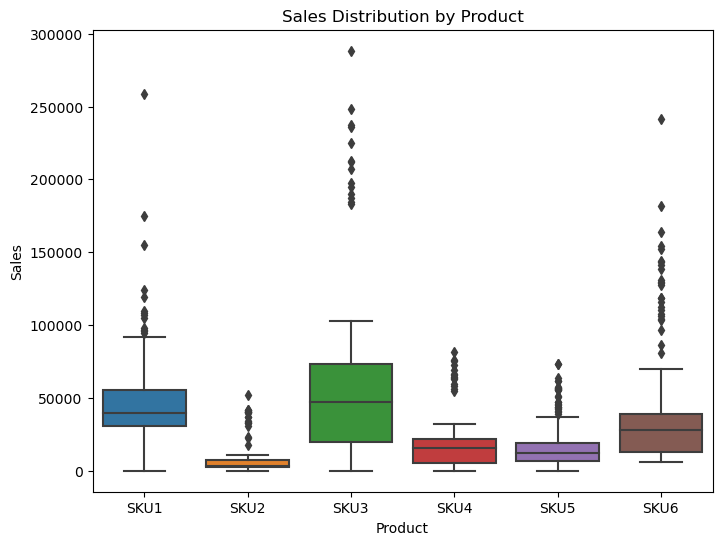

In [12]:
# Check for missing outliers in Sales:
plt.figure(figsize=(8, 6))
sns.boxplot(x= "Product", y= "Sales", data = forecasting_df)
plt.title("Sales Distribution by Product")
plt.show()

In [13]:
# Handling Outliers
from scipy import stats
forecasting_df["Sales"] = forecasting_df.groupby("Product")["Sales"].transform(lambda x: stats.mstats.winsorize(x, limits=[0.05, 0.05]))


There are no missing data in the Forecast Spreadsheet, so there's no need to perform a task to deal with missing data for the Sales. However, if there were missing data, this is what I would do:

In [16]:
# Handling missing values:
forecasting_df["Sales"] = forecasting_df["Sales"].fillna(forecasting_df.groupby("Product")["Sales"].transform("mean"))

Additionally, we could use these techniques to deal with Missing Values and Outliers

In [20]:
# Fill missing values in 'Sales' column with the median of the respective 'Product'
forecasting_df['Sales'] = forecasting_df.groupby('Product')['Sales'].transform(lambda x: x.fillna(x.median()))

# Fill missing values in 'Price Discount (%)' column with the overall median (or per group)
forecasting_df['Price Discount (%)'] = forecasting_df['Price Discount (%)'].fillna(forecasting_df['Price Discount (%)'].median())

# Display the DataFrame after median imputation
print("Data after Median Imputation:")
print(forecasting_df)

Data after Median Imputation:
     Product       date   Sales  Price Discount (%)  In-Store Promo  \
0       SKU1 2017-02-05   27750                0.00               0   
1       SKU1 2017-02-12   29023                0.00               1   
2       SKU1 2017-02-19   45630                0.17               0   
3       SKU1 2017-02-26   26789                0.00               1   
4       SKU1 2017-03-05   41999                0.17               0   
...      ...        ...     ...                 ...             ...   
1213    SKU6 2020-10-18   96619                0.54               0   
1214    SKU6 2020-10-25  115798                0.52               0   
1215    SKU6 2020-11-01  131072                0.54               1   
1216    SKU6 2020-11-08   26445                0.44               1   
1217    SKU6 2020-11-15   26414                0.44               0   

      Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
0                   0                0 

In [22]:
# Calculate z-scores for the 'Sales' column
forecasting_df['Sales_zscore'] = stats.zscore(forecasting_df['Sales'])

# Define a threshold for outlier detection (e.g., z-score greater than 3 or less than -3)
threshold = 3
forecasting_df['Outlier'] = np.where((forecasting_df['Sales_zscore'] > threshold) | (forecasting_df['Sales_zscore'] < -threshold), 'Yes', 'No')

# Display the rows where outliers are detected
outliers = forecasting_df[forecasting_df['Outlier'] == 'Yes']
print("\nOutliers detected using Z-Score:")
print(outliers)

# Remove z-score and outlier columns for a clean display
forecasting_df = forecasting_df.drop(columns=['Sales_zscore', 'Outlier'])

# Final DataFrame
print("\nFinal DataFrame after processing:")
print(forecasting_df)


Outliers detected using Z-Score:
     Product       date   Sales  Price Discount (%)  In-Store Promo  \
421     SKU3 2017-05-07  189965                0.50               1   
426     SKU3 2017-06-11  189965                0.50               1   
437     SKU3 2017-08-27  189965                0.50               1   
447     SKU3 2017-11-05  189965                0.50               1   
478     SKU3 2018-06-10  189965                0.50               1   
494     SKU3 2018-09-30  189965                0.50               1   
514     SKU3 2019-02-17  189965                0.50               1   
530     SKU3 2019-06-09  189965                0.55               1   
540     SKU3 2019-08-18  189965                0.52               1   
546     SKU3 2019-09-29  189965                0.54               1   
552     SKU3 2019-11-10  182891                0.49               1   
566     SKU3 2020-02-16  187548                0.51               1   
588     SKU3 2020-07-19  184365            